# Importing Necessary Modules

In [ ]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from skactiveml.classifier import SklearnClassifier
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import unlabeled_indices, labeled_indices, MISSING_LABEL
from skactiveml.visualization import plot_decision_boundary, plot_utilities

import warnings
mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

# Generating The Dataset

Text(0.5, 1.0, 'DataSet')

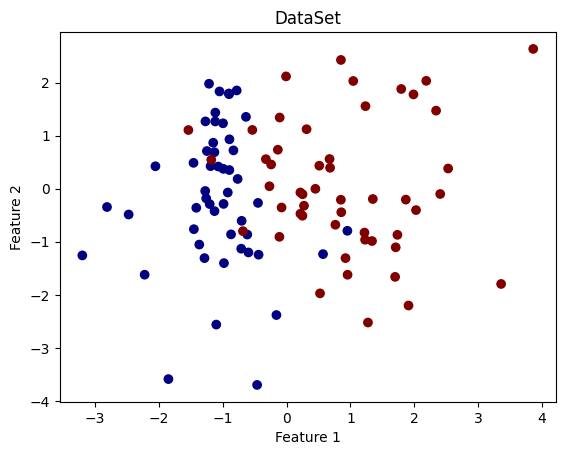

In [3]:
X, y_true = make_classification(n_features=2, n_redundant=0, random_state=0)
bound =[[min(X[:, 0]), min(X[:, 1])], [max(X[:, 0]), max(X[:, 1])]]

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='jet')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DataSet')

In [5]:
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)
print(y)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


In [7]:
clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
clf

SklearnClassifier(classes=array([0, 1]), estimator=LogisticRegression())

In [10]:
qs = UncertaintySampling(method='entropy', random_state=42)
qs

UncertaintySampling(method='entropy', random_state=42)

/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/skactiveml/classifier/_wrapper.py:322: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[np.int64(0), np.int64(0)]`.
  warnings.warn(
/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/skactiveml/classifier/_wrapper.py:322: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[np.int64(0), np.int64(0)]`.
  warnings.warn(
/Users/sonitambashta/miniconda3/lib/python3.12/site-packages/skactiveml/classifier/_wrapper.py:232: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[np.in

After 2 iterations:
The accuracy score is 0.68.


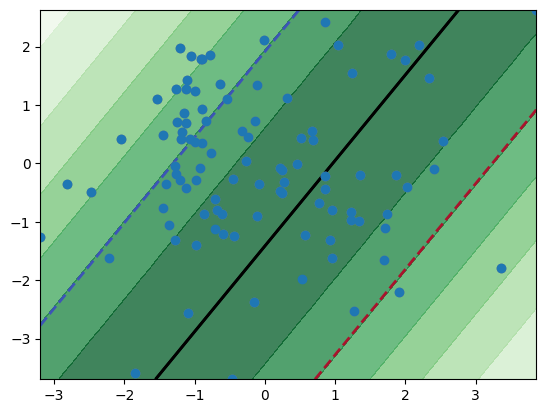

After 10 iterations:
The accuracy score is 0.95.


/var/folders/pw/r2b9k4d14qj10kk2wc0667fr0000gn/T/ipykernel_60272/3184190659.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], cmap='jet')


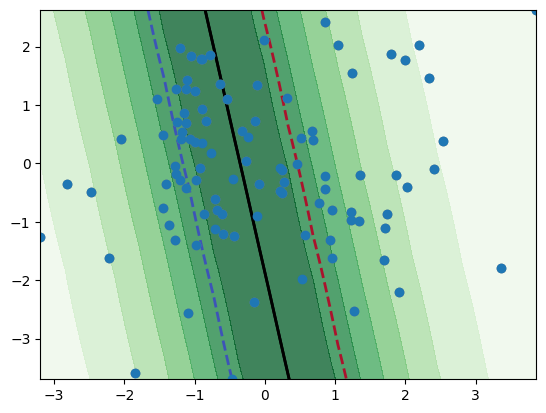

After 20 iterations:
The accuracy score is 0.95.


/var/folders/pw/r2b9k4d14qj10kk2wc0667fr0000gn/T/ipykernel_60272/3184190659.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], cmap='jet')


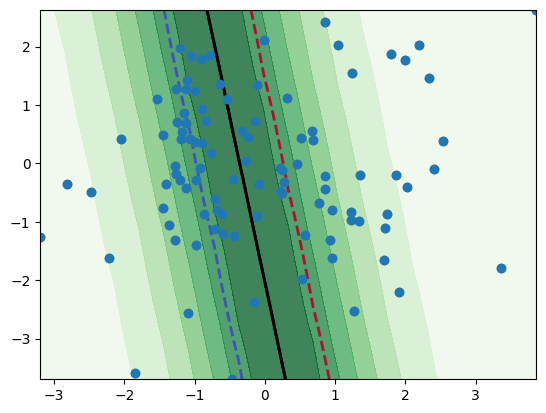

In [11]:
n_cycles = 20
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)
clf.fit(X, y)
for c in range(n_cycles):
    query_idx = qs.query(X=X, y=y, clf=clf, batch_size=1)
    y[query_idx] = y_true[query_idx]
    clf.fit(X, y)
    
    # plot the active learner
    unlbld_idx = unlabeled_indices(y)
    lbld_idx = labeled_indices(y)
    if len(lbld_idx) in [2, 10, 20]:
        print(f'After {len(lbld_idx)} iterations:')
        print(f'The accuracy score is {clf.score(X,y_true)}.')
        plot_utilities(qs, X=X, y=y, clf=clf, feature_bound=bound)
        plot_decision_boundary(clf, feature_bound=bound)
        plt.scatter(X[unlbld_idx,0], X[unlbld_idx,1], c='gray')
        plt.scatter(X[:,0], X[:,1], cmap='jet')
        plt.show()